In [4]:
import os
import matplotlib.pyplot as plt
import shutil
import random

In [2]:
ACTORS_BASE_DIR= "../dataset/actors"
ACTRESSES_BASE_DIR = "../dataset/actresses"

In [3]:
def count_images_in_folders(base_dir):
    folder_image_counts = []
    for root, dirs, _ in os.walk(base_dir):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            image_count = len([file for file in os.listdir(dir_path) if file.endswith('.jpeg')])
            folder_image_counts.append(image_count)
    return folder_image_counts

In [25]:
actors_image_counts = count_images_in_folders(ACTORS_BASE_DIR)
actresses_image_counts = count_images_in_folders(ACTRESSES_BASE_DIR)

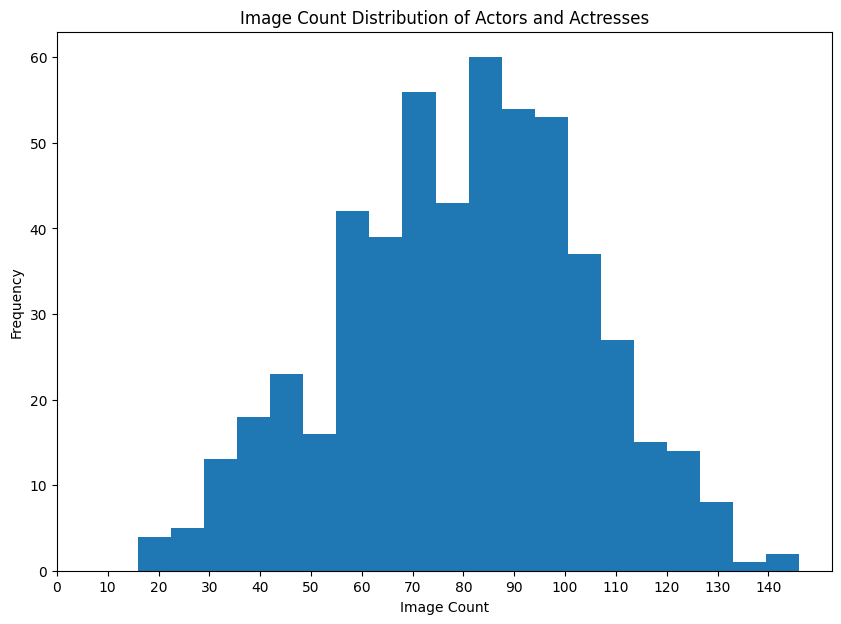

In [26]:
# Plotting the histogram
plt.figure(figsize=(10, 7))
plt.hist(actors_image_counts + actresses_image_counts, bins=20)
plt.title('Image Count Distribution of Actors and Actresses')
plt.xlabel('Image Count')
plt.ylabel('Frequency')
plt.xticks(range(0, max(actors_image_counts + actresses_image_counts) + 1, 10))
plt.show()

#  `Filter Outlier`

In [29]:
def filter_and_making_folders(src_base_dir, dest_base_dir, min_images=40, max_images=130):
    if not os.path.exists(dest_base_dir):
        os.makedirs(dest_base_dir)
    
    for root, dirs, _ in os.walk(src_base_dir):
        for dir_name in dirs:
            src_dir_path = os.path.join(root, dir_name)
            image_count = len([file for file in os.listdir(src_dir_path) if file.endswith('.jpeg')])
            
            if min_images < image_count < max_images:
                relative_path = os.path.relpath(src_dir_path, src_base_dir)
                dest_dir_path = os.path.join(dest_base_dir, relative_path)
                
                if not os.path.exists(dest_dir_path):
                    os.makedirs(dest_dir_path)
                
                for file in os.listdir(src_dir_path):
                    if file.endswith('.jpeg'):
                        src_file_path = os.path.join(src_dir_path, file)
                        dest_file_path = os.path.join(dest_dir_path, file)
                        shutil.copy2(src_file_path, dest_file_path)

In [ ]:
src_base_dir = "../dataset"
dest_base_dir = "../dataset-filter"

filter_and_making_folders(os.path.join(src_base_dir, "actors"), os.path.join(dest_base_dir, "actors"))
filter_and_making_folders(os.path.join(src_base_dir, "actresses"), os.path.join(dest_base_dir, "actresses"))

# `Check disbutrition`

In [4]:
actors_image_counts = count_images_in_folders("../dataset-filter/actors")
actresses_image_counts = count_images_in_folders("../dataset-filter/actresses")

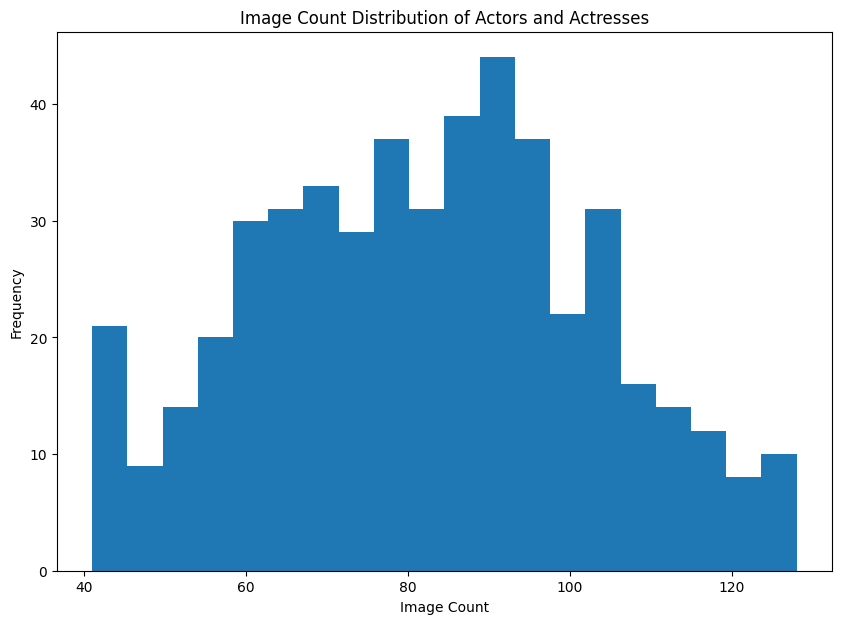

In [6]:
plt.figure(figsize=(10, 7))
plt.hist(actors_image_counts + actresses_image_counts, bins=20)
plt.title('Image Count Distribution of Actors and Actresses')
plt.xlabel('Image Count')
plt.ylabel('Frequency')
plt.show()

# `Split data into Train/Test/Val`

In [7]:
def combine_folders(src_dirs, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    
    for src_dir in src_dirs:
        for root, dirs, _ in os.walk(src_dir):
            for dir_name in dirs:
                src_dir_path = os.path.join(root, dir_name)
                dest_subdir_path = os.path.join(dest_dir, dir_name)
                
                if not os.path.exists(dest_subdir_path):
                    os.makedirs(dest_subdir_path)
                
                for file in os.listdir(src_dir_path):
                    if file.endswith('.jpeg'):
                        src_file_path = os.path.join(src_dir_path, file)
                        dest_file_path = os.path.join(dest_subdir_path, file)
                        
                        # Ensure unique file names
                        base, ext = os.path.splitext(file)
                        counter = 1
                        while os.path.exists(dest_file_path):
                            dest_file_path = os.path.join(dest_subdir_path, f"{base}_{counter}{ext}")
                            counter += 1
                        
                        shutil.copy2(src_file_path, dest_file_path)

def split_dataset(src_base_dir, dest_base_dirs, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1):
    for root, dirs, _ in os.walk(src_base_dir):
        for dir_name in dirs:
            src_dir_path = os.path.join(root, dir_name)
            images = [file for file in os.listdir(src_dir_path) if file.endswith('.jpeg')]
            random.shuffle(images)
            
            train_split = int(len(images) * train_ratio)
            test_split = int(len(images) * (train_ratio + test_ratio))
            
            train_images = images[:train_split]
            test_images = images[train_split:test_split]
            val_images = images[test_split:]
            
            for dest_base_dir, image_set in zip(dest_base_dirs, [train_images, test_images, val_images]):
                dest_dir_path = os.path.join(dest_base_dir, dir_name)
                if not os.path.exists(dest_dir_path):
                    os.makedirs(dest_dir_path)
                
                for image in image_set:
                    src_file_path = os.path.join(src_dir_path, image)
                    dest_file_path = os.path.join(dest_dir_path, image)
                    shutil.copy2(src_file_path, dest_file_path)


In [ ]:
actors_src_dir = "../dataset-filter/actors"
actresses_src_dir = "../dataset-filter/actresses"
combined_dest_dir = "../dataset-filter/combined"

combine_folders([actors_src_dir, actresses_src_dir], combined_dest_dir)

train_base_dir = "../data/train"
test_base_dir = "../data/test"
val_base_dir = "../data/val"

for base_dir in [train_base_dir, test_base_dir, val_base_dir]:
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

split_dataset(combined_dest_dir, [train_base_dir, test_base_dir, val_base_dir])